In this problem, I have trained a Hopfield network using the attached image. Using the attached training image to train the network and then evaluated its performance employing the attached test image. To complete this task, I  have completed each cell step by step.




In [1]:
import numpy as np
import random
import PIL
from PIL import Image
import os
import re
import cv2
from google.colab.patches import cv2_imshow

In [2]:
#Convert a matrix to a vector
def mat2vec(x):
    """convert the matrix x to a vector
    input:
        [[1,2,3],
        [4,5,6],
        [7,8,9]]
    output:
        [1,2,3,4,5,6,7,8,9]"""

    #### Implement your code ###

    tmp1 = list()
    for i in range(len(x)):
        for j in range(len(x[i])):
            tmp1.append(x[i][j])


    return tmp1

In [3]:
def create_W(x):
  """
  Create a square matrix with the same size as the input size.
  Note 1: The weight matrix must be symmetric
  Tip 1: For row i and column j, while i != j, place the value x [i] * x [j] in the weight matrix w [i, j]
  Tip 2: For row i and column j, while i=j, put the value 0 in the weight matrix w [i, j]
  """
  #### Impelement your code ###

  length = len(x)
  w = [[ 0 for j in range(length)]for i in range(length)]
  for i in range(length):
    for j in range(length):
      if i != j :
        w[i][j] = x[i] * x[j]

  return w

In [4]:
#Read an image file and convert it to a pattern of the image
def readImg2array(file,size, threshold= 145):
    img = Image.open(file).convert(mode="L")
    img= img.resize(size)
    #img.thumbnail(size,Image.ANTIALIAS)
    imgArray = np.asarray(img,dtype=np.uint8)
    x = np.zeros(imgArray.shape, dtype = np.float64)

    """
    Set the value to 1 for each pixel value with the larger than the threshold,
    and Set the value to -1 for each image pixel with a value of 0.



    """
    #### Implement your code ###

    x[imgArray>threshold] = 1
    x[x==0] = -1

    return x

In [5]:
#Convert a numpy array to an image file like Jpeg
def array2img(data, outFile = None):

    #data is 1 or -1 matrix
    y = np.zeros(data.shape,dtype=np.uint8)
    y[data==1] = 255
    y[data==-1] = 0
    img = Image.fromarray(y,mode="L")
    if outFile is not None:
        img.save(outFile)
    return img

In [6]:
#Update the test input pattern (y_vec) based on the weight matrix
def update(w,y_vec,theta=0.5,time=100):

  """Once in a while, select a random number between 0 and the size of the input vector -1.
Then use the random number line of the weight matrix to multiply internally by the input vector.
Subtract the result from theta
If the end result is greater than 0, enter a value of 1 in the input vector, otherwise replace -1.
"""
#### Impelement your code ###
  for i in range(time):

      # select random number between 0 and -1
      rndm = random.randint(0,len(y_vec)-1)

      # multiply random number of line  of weight matrix by the vector
      rndm_mul = np.dot(w[rndm][:],y_vec)

      # subtract from theta
      result = rndm_mul - theta

      # check condition
      if result > 0:
        y_vec[rndm] = 1

      else:
        y_vec[rndm] = -1



  return y_vec

In [7]:

def hopfield(train_file, test_file, theta = 0.5, time = 1000, size = (100,100), threshold = 60):

  """Using the built-in functions, Do the following steps:
1- Read the input image and extract its pattern
2. Convert the obtained pattern into a vector
3- Make a weight matrix based on the vector of the previous step
4- Read the test image and extract its pattern
5- Convert the test pattern into a vector and give it as the input of the update function along with the built-in weight matrix.

"""
#### Impelement your code ###

  # step 1
  train = readImg2array("/content/Train.png", size, threshold)

  # step 2
  vector = mat2vec(train)

  # step 3
  weight = create_W(vector)

  # step 4
  test =  readImg2array("/content/Test.png", size, threshold)

  # step 5
  y_vec = mat2vec(test)
  y_vec_after = update(w = weight, y_vec = y_vec, theta = theta, time = time)
  y_vec_after = np.array(y_vec_after).reshape(test.shape)
  after_img = array2img(y_vec_after,outFile=None)
  after_img.save("result.jpg")
  img = cv2.imread('result.jpg')
  cv2_imshow(img)


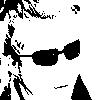

In [8]:
train_file = cv2.imread('/content/Train.png')
test_file =  cv2.imread('/content/Test.png')

hopfield(train_file, test_file, theta=0.5,time=100,size=(100,100),threshold=60)
